## Pre-Lecture Homework

**Q2.** 

1.**Accuracy** metric measures the proportion of true (both true positives and true negatives) results in the population. A real-world scenario that might be most appropriately addressed by Accuracy is Weather Prediction (Rain vs. No Rain). Since accuracy is more useful when classes are balanced, in this context that would be when the number of rain and no-rain days is roughly equal, and the consequences of false positives (predicting rain when it's sunny) and false negatives (predicting no rain when it rains) are similar. This allows for Accuracy to give a general measure of the overall system's performance. For instance, if the system only correctly predicts 300 days of rain or no rain out of 365, it will have an 82% accuracy.  


2.**Sensitivity** metric measures the proportion of actual positives that are correctly identified. A real-world application of this metric is Cancer Screening. Here, sensitivity would focus on detecting all cancer cases (actual positives). A high sensitivity means that the test will find most or all patients with cancers, minimizing false negatives and the chances of missing a serious case.


3.**Specificity** measures the proportion of true negatives that are correctly identified. A real-world scenario that this metric could address is identifying people unlikely to experience side effects from a particular drug (correctly identifying negatives). This way, the metric would be useful in minimizing false positives, and fewer people would be treated for risks they don't have, leading to more efficient use of resources and less unnecessary concern. 


4.**Precision** measures the proportion of predictive positives that are actually correct. Precision could be used to filter email spams, ensuring that most flagged emails are truly spam. High precision would minimize false positives (non-spam emails incorrectly flagged as spam), which is critical when the cost of these false positives is high, as it can cause important emails to be missed.  



**Q4.** 

In [25]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the number of observations
print(f"Training set observations: {X_train.shape[0]}")
print(f"Testing set observations: {X_test.shape[0]}")


Training set observations: 255
Testing set observations: 64


a)y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] ## This step converts the Hard_or_Paper categorical variable into a dummy variable where 1 represents the Hardcover (H) and 0 represents Paperback (P). 

b) X = ab_reduced_noNaN[['List Price']] ##This step selects the List Price column as the feature variable (predictor) for the model 

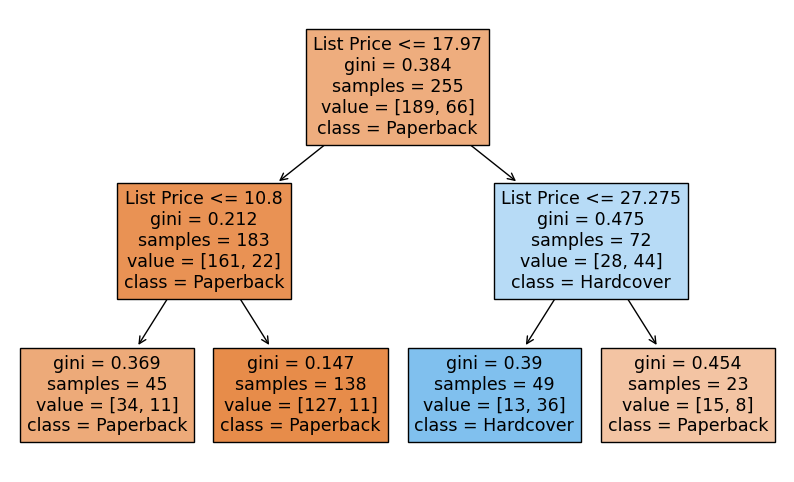

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


clf.fit(X,y) trains the decision tree classifier on the List Price feature to predict whether the book is hardcover or paperback. tree.plot_tree(clf) then generates a visual representation of the decision tree, and this tree can be interpreted to see what price thresholds based on the variable List Price predict the book being hardcover or paperback. 

## Post-Lecture Homework

**Q5.**

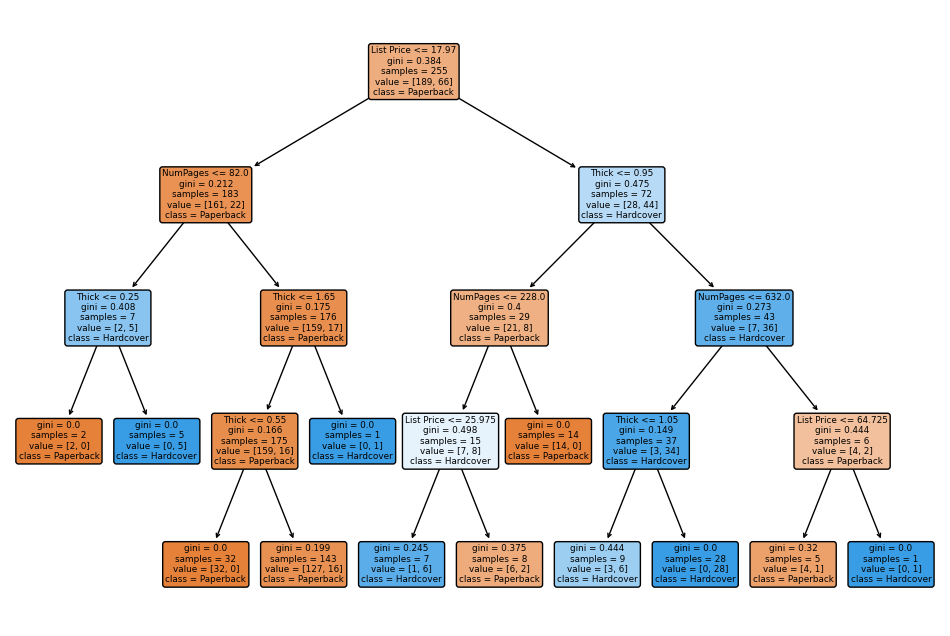

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming the DataFrame is already loaded as ab_reduced_noNaN
# Preprocessing: Drop NaNs, set types, etc.
ab_reduced_noNaN = ab_reduced_noNaN.dropna()
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define features and target
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X_train, y_train)

# Visualize the trained decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)
plt.show()



**Q6.**

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Assuming the DataFrame ab_reduced_noNaN and ab_reduced_noNaN_test are already available

# Prepare the feature columns for both training and test sets
X_train = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Ensure the target column is properly set up for training and test sets
y_train = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']  # Target for training
y_test = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['H']  # Target for testing

# Initialize and train the models
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

clf2 = DecisionTreeClassifier(max_depth=4)
clf2.fit(X_train, y_train)

# Predictions for both classifiers
y_pred_clf = clf.predict(X_test)   # For the first model
y_pred_clf2 = clf2.predict(X_test)  # For the second model

# Confusion Matrix for clf (first model)
cm_clf = confusion_matrix(y_test, y_pred_clf)
# Confusion Matrix for clf2 (second model)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Accuracy Calculation
accuracy_clf = accuracy_score(y_test, y_pred_clf)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Sensitivity (True Positive Rate) and Specificity (True Negative Rate) for clf
TP_clf = cm_clf[1, 1]  # True Positives (Hardcover predicted as Hardcover)
TN_clf = cm_clf[0, 0]  # True Negatives (Paperback predicted as Paperback)
FP_clf = cm_clf[0, 1]  # False Positives (Paperback predicted as Hardcover)
FN_clf = cm_clf[1, 0]  # False Negatives (Hardcover predicted as Paperback)

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)

# Sensitivity and Specificity for clf2
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)

# Displaying the results
print("Confusion Matrix for clf:")
print(cm_clf)
print(f"Accuracy for clf: {accuracy_clf:.2f}")
print(f"Sensitivity for clf: {sensitivity_clf:.2f}")
print(f"Specificity for clf: {specificity_clf:.2f}")

print("\nConfusion Matrix for clf2:")
print(cm_clf2)
print(f"Accuracy for clf2: {accuracy_clf2:.2f}")
print(f"Sensitivity for clf2: {sensitivity_clf2:.2f}")
print(f"Specificity for clf2: {specificity_clf2:.2f}")


Confusion Matrix for clf:
[[42  2]
 [ 2 18]]
Accuracy for clf: 0.94
Sensitivity for clf: 0.90
Specificity for clf: 0.95

Confusion Matrix for clf2:
[[42  2]
 [ 2 18]]
Accuracy for clf2: 0.94
Sensitivity for clf2: 0.90
Specificity for clf2: 0.95


**Q7.**  The differences between the 2 confusion matrices in question 7 are due to the variations in the features used for prediction in each model. In the first confusion matrix, only the 'List Price' feature is used to predict the outcome (paperback or hardcover). In the second matrix, the model uses a combination of 'NumPages,'Thick', and 'List Price' features, which provides this model with more information than the first. Including more features in the second model gives it more information, leading to better predictions and more balanced classification performance.

The confusion matrices in Q6 are better than the ones in Q7 as they use three features (NumPages, Thick, and List Price) for both training and testing the decision tree classifiers, leading to more reliable classifications. Code in Q7 only uses one feature (List Price) in the first model and 3 features (NumPages, Thick, and List Price) in the second, but it only evaluates these models using the training set rather than on a test set, leading to less effective models in generalizing to unseen data. Furthermore, the confusion matrices in Q6 are computed using the X_test data set, which represents unseen data, allowing for better evaluation of the model's ability to generalize to new data, and the confusion matrices in Code 7 are based on the training set, which can result in overfitting and less reliable results. Lastly, the code in Q6 calculates key performance metrics like accuracy, sensitivity, and specificity for deeper insight into model performance, whereas the code in Q7 only focuses on visualizing confusion matrices without calculating these important performance metrics, which does not assess as well how the models identify positive and negative cases. 

**CHAT GPT SUMMARIES**

Here’s a general summary of our entire session:

1. **Machine Learning Models**: We've worked through the process of training and evaluating decision tree models using the `DecisionTreeClassifier` from `sklearn`, applied to a dataset with features like `NumPages`, `Thick`, and `List Price`. We discussed how to generate confusion matrices and key evaluation metrics like accuracy, sensitivity, and specificity to assess model performance.

2. **Confusion Matrices**: We explored how confusion matrices represent model performance by showing the true positives, true negatives, false positives, and false negatives. We examined why models that use more relevant features and evaluate on a test set (rather than a training set) tend to provide more accurate and reliable metrics.

3. **Code Comparisons**: We compared two different code snippets (Code 6 and Code 7), discussing the advantages of using multiple features in training, evaluating models on test sets, and calculating performance metrics to get a clearer understanding of model effectiveness.

4. **Debugging and Problem-Solving**: We worked through some errors related to feature mismatches in the data and confusion matrix visualizations, helping to identify better ways of comparing models and interpreting results.

5. **Understanding Key Concepts**: Through practical examples, we discussed various key machine learning concepts like overfitting, model evaluation, and the importance of choosing the right features for training.

https://chatgpt.com/share/673f9ec4-fc14-8006-b87e-e84dd67e2781


Here's a summary of our session:

1. **Decision Tree Classifier Analysis**:
   - You trained two `DecisionTreeClassifier` models (`clf` and `clf2`) on a dataset (`ab_reduced_noNaN`) to predict the `'Hard_or_Paper'` (Paperback or Hardcover) column based on three features: `'NumPages'`, `'Thick'`, and `'List Price'`.
   - Both models were trained using the same hyperparameters (`max_depth=4`), and you visualized the decision tree for `clf2` using `plot_tree`.
   
2. **Confusion Matrix & Model Evaluation**:
   - After testing the models on a test dataset (`ab_reduced_noNaN_test`), you generated confusion matrices and calculated performance metrics (accuracy, sensitivity, specificity) for both models (`clf` and `clf2`).
   - Both models gave identical results:
     - Confusion Matrix: `[[42  2], [ 2 18]]`
     - Accuracy: `0.94`
     - Sensitivity: `0.90`
     - Specificity: `0.95`
   - This indicated that both models performed the same on the test set.

3. **Explanation**:
   - It is normal to observe the same results from both models if they have the same structure (e.g., same depth of tree) and are trained on the same data. Since the models were essentially the same, their predictions and performance metrics were identical.
   - The performance of both models (with high accuracy, sensitivity, and specificity) suggests they are doing well at distinguishing between hardcover and paperback books.

4. **Next Steps**:
   - If you'd like to see different results between `clf` and `clf2`, consider experimenting with different model hyperparameters (e.g., `max_depth`, `min_samples_split`).
   - You could also try using a different classification algorithm (e.g., Random Forest, SVM) to compare the performance.

https://chatgpt.com/share/673f9ee1-37c0-8006-b776-1da95c416aa6
